# Machine Learning for Insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (15, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df[df.duplicated(keep=False)]

,age,sex,bmi,children,smoker,region,expenses
195,19,male,30.6,0,no,northwest,1639.56
581,19,male,30.6,0,no,northwest,1639.56


In [6]:
insurance = df.drop_duplicates()
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [7]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   expenses  1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


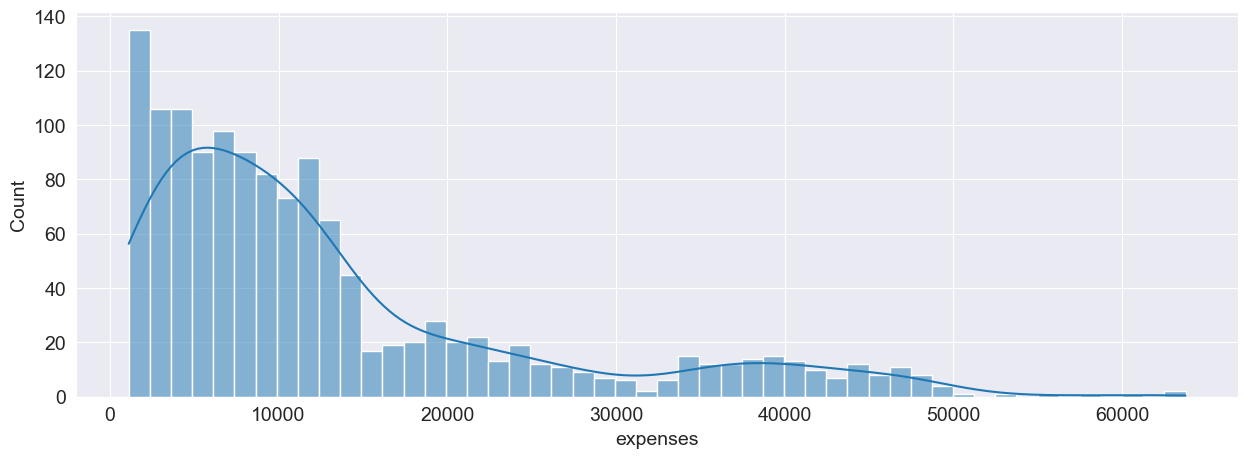

In [8]:
sns.histplot(data=insurance, x='expenses', bins=50 ,kde=True);

In [9]:
insurance.expenses.describe()

count     1337.000000
mean     13279.121638
std      12110.359657
min       1121.870000
25%       4746.340000
50%       9386.160000
75%      16657.720000
max      63770.430000
Name: expenses, dtype: float64

In [10]:
insurance.age.describe()

count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

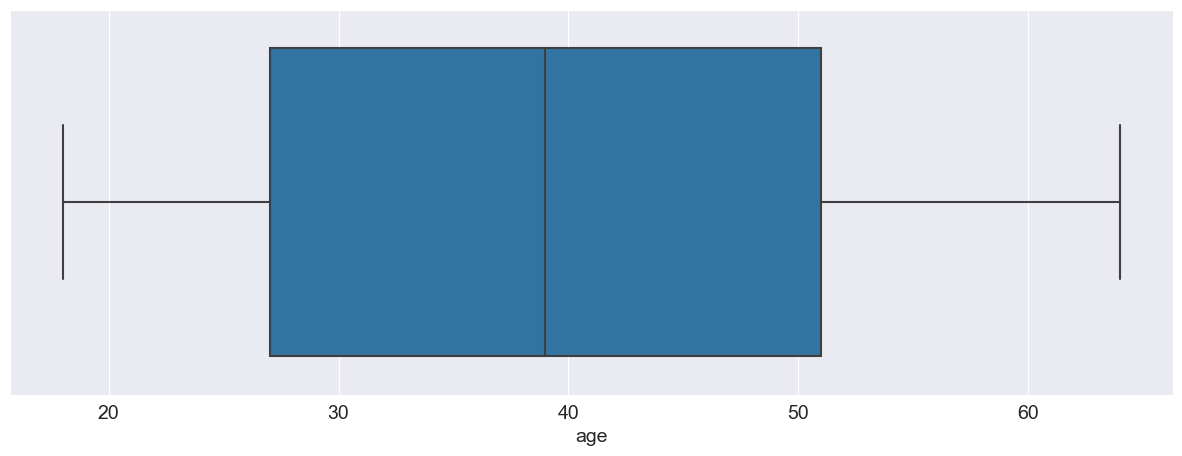

In [11]:
sns.boxplot(data=insurance, x='age');

In [12]:
insurance.sex.value_counts()

sex
male      675
female    662
Name: count, dtype: int64

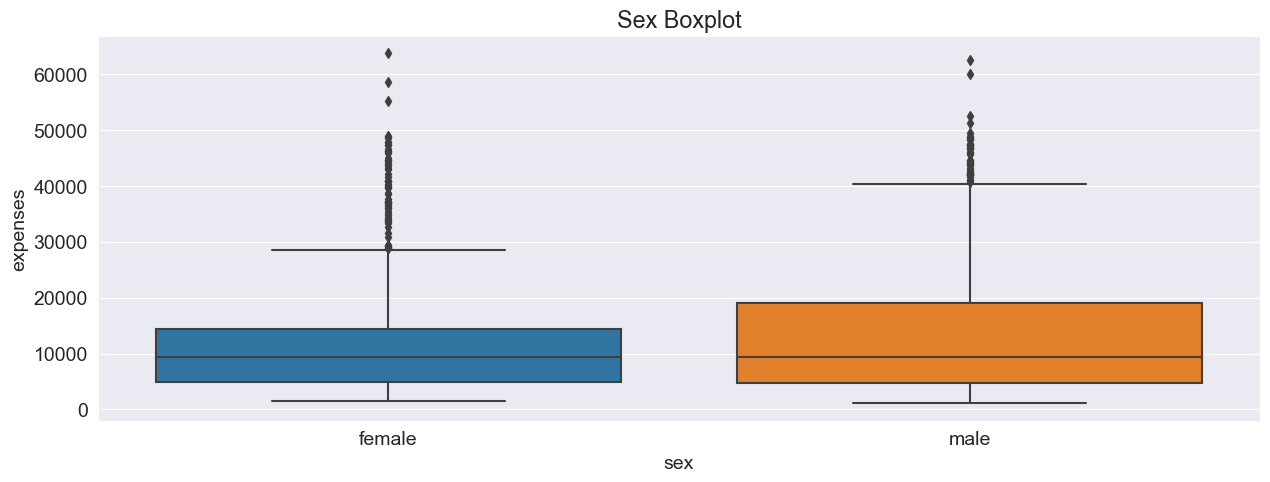

In [13]:
sns.boxplot(data=insurance, x='sex', y='expenses')
plt.title('Sex Boxplot');

In [14]:
insurance.groupby('sex')['expenses'].mean()

sex
female    12569.578897
male      13974.999111
Name: expenses, dtype: float64

In [15]:
females_expenses = insurance.groupby('sex')['expenses'].mean()[0]
male_expenses = insurance.groupby('sex')['expenses'].mean()[1]
male_expenses-females_expenses

1405.4202138301443

In [16]:
insurance[insurance.sex=='male'].expenses.describe()

count      675.000000
mean     13974.999111
std      12971.958641
min       1121.870000
25%       4654.025000
50%       9377.900000
75%      19006.690000
max      62592.870000
Name: expenses, dtype: float64

In [17]:
insurance[insurance.sex=='female'].expenses.describe()

count      662.000000
mean     12569.578897
std      11128.703817
min       1607.510000
25%       4885.162500
50%       9412.965000
75%      14454.690000
max      63770.430000
Name: expenses, dtype: float64

In [18]:
insurance.bmi.describe()

count    1337.000000
mean       30.665520
std         6.100664
min        16.000000
25%        26.300000
50%        30.400000
75%        34.700000
max        53.100000
Name: bmi, dtype: float64

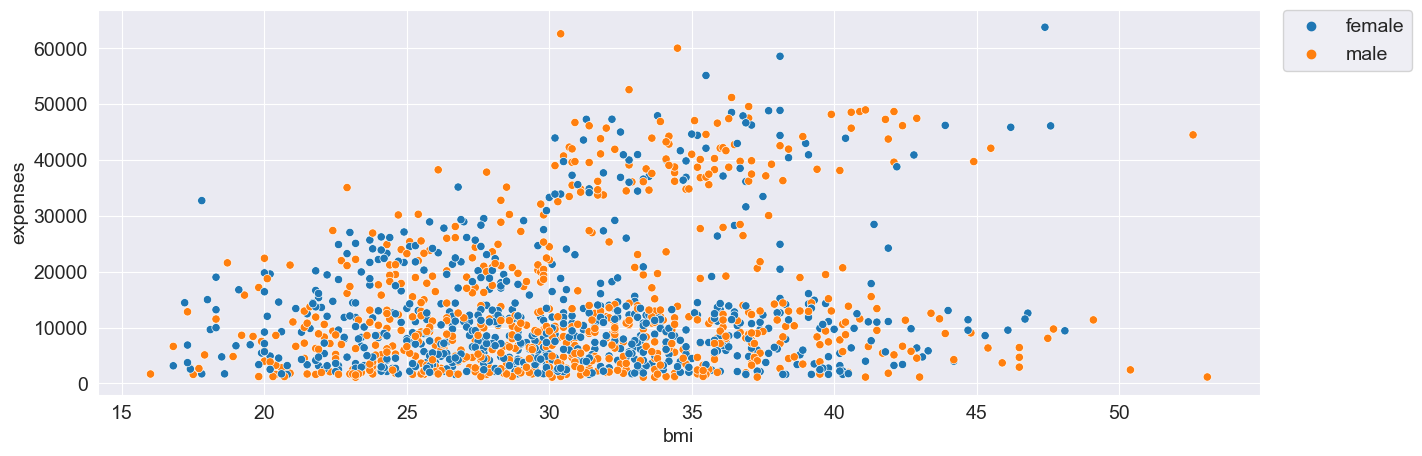

In [19]:
sns.scatterplot(data=insurance, x='bmi', y='expenses', hue='sex')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);

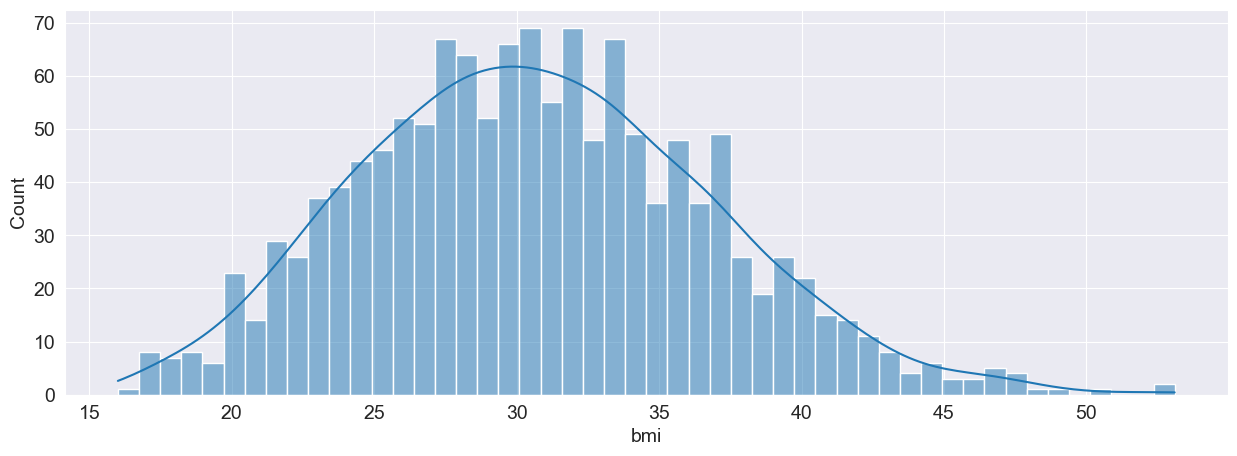

In [20]:
sns.histplot(data=insurance, x='bmi', bins=50, kde=True);

In [21]:
insurance.children.describe()

count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64

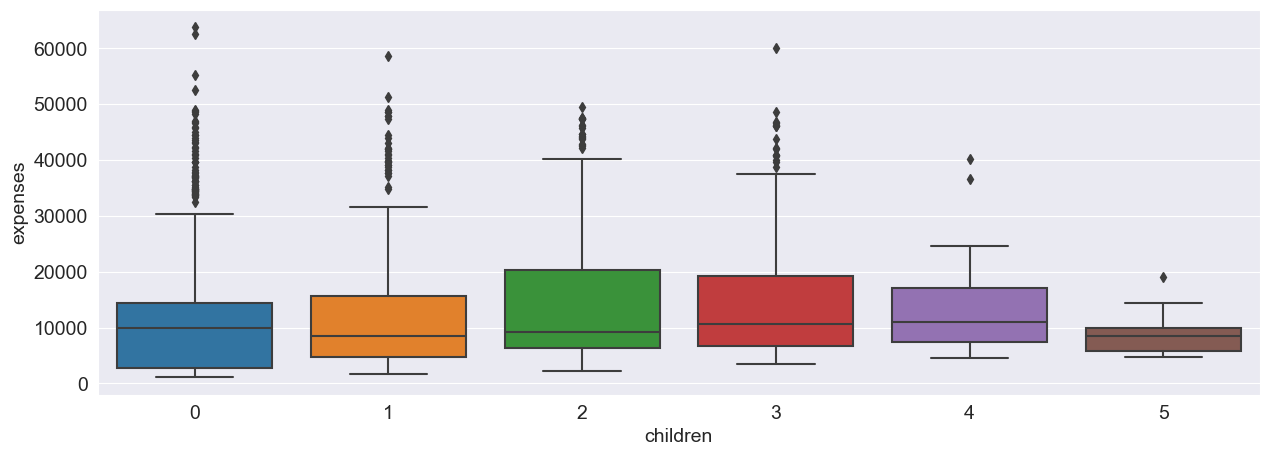

In [22]:
sns.boxplot(data=insurance, x='children', y='expenses');

In [23]:
insurance.groupby('children')['expenses'].mean()

children
0    12384.695515
1    12731.171821
2    15073.564000
3    15355.318535
4    13850.656800
5     8786.035556
Name: expenses, dtype: float64

In [24]:
insurance.smoker.value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

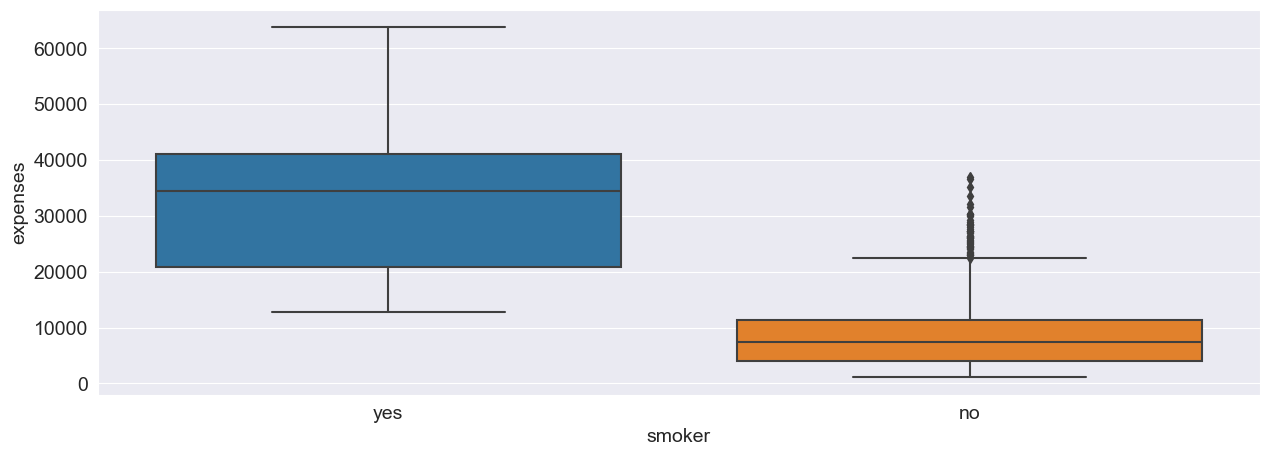

In [25]:
sns.boxplot(data=insurance, x='smoker', y='expenses');

In [26]:
insurance[insurance.smoker=='yes'].expenses.describe()

count      274.000000
mean     32050.231971
std      11541.547338
min      12829.460000
25%      20826.245000
50%      34456.350000
75%      41019.205000
max      63770.430000
Name: expenses, dtype: float64

In [27]:
insurance[insurance.smoker=='no'].expenses.describe()

count     1063.000000
mean      8440.660461
std       5992.973734
min       1121.870000
25%       3988.885000
50%       7345.730000
75%      11363.020000
max      36910.610000
Name: expenses, dtype: float64

In [28]:
insurance.groupby('smoker')['expenses'].mean()

smoker
no      8440.660461
yes    32050.231971
Name: expenses, dtype: float64

In [29]:
insurance.region.value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

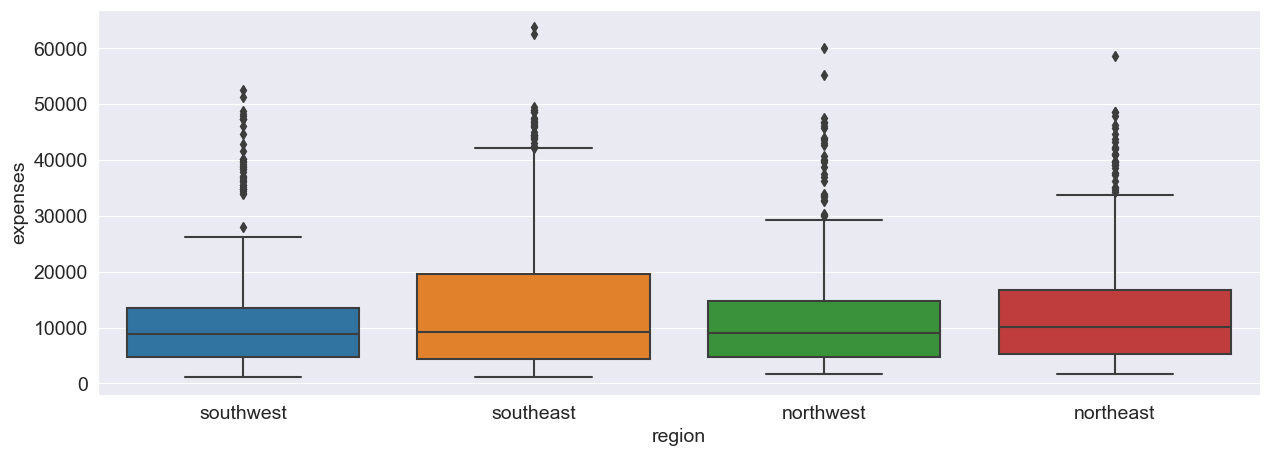

In [30]:
sns.boxplot(data=insurance, x='region', y='expenses');

In [31]:
input_df = insurance.drop(columns='expenses')
target_df = insurance.expenses

In [32]:
input_df

,age,sex,bmi,children,smoker,region
0,19,female,27.9,0,yes,southwest
1,18,male,33.8,1,no,southeast
2,28,male,33.0,3,no,southeast
3,33,male,22.7,0,no,northwest
4,32,male,28.9,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest
1334,18,female,31.9,0,no,northeast
1335,18,female,36.9,0,no,southeast
1336,21,female,25.8,0,no,southwest


In [33]:
target_df

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

In [34]:
def bmi_estimator(column):
    if column < 18.5:
        return 'underweight'
    elif (column >= 18.5) and (column<=24.9):
        return 'healthy weight'
    elif (column>=25) and (column<=29.9):
        return 'overweight'
    else:
        return 'obese'

In [35]:
input_df['bmi_class']=input_df.bmi.map(bmi_estimator)
input_df

,age,sex,bmi,children,smoker,region,bmi_class
0,19,female,27.9,0,yes,southwest,overweight
1,18,male,33.8,1,no,southeast,obese
2,28,male,33.0,3,no,southeast,obese
3,33,male,22.7,0,no,northwest,healthy weight
4,32,male,28.9,0,no,northwest,overweight
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,obese
1334,18,female,31.9,0,no,northeast,obese
1335,18,female,36.9,0,no,southeast,obese
1336,21,female,25.8,0,no,southwest,overweight


In [36]:
sex_dict = {'male':0, 'female':1}
smoker_dict = {'no':0, 'yes':1}

input_df['sex'] = input_df.sex.map(sex_dict)
input_df['smoker'] = input_df.smoker.map(smoker_dict)

In [37]:
columns_to_encode = ['region', 'bmi_class']

In [38]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(input_df[columns_to_encode])

encoded_cols = list(encoder.get_feature_names_out(columns_to_encode))

input_df[encoded_cols] = encoder.transform(input_df[columns_to_encode])

In [39]:
input_df = input_df.drop(columns='region')
input_df

,age,sex,bmi,children,smoker,bmi_class,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,19,1,27.9,0,1,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,18,0,33.8,1,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,28,0,33.0,3,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,33,0,22.7,0,0,healthy weight,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,32,0,28.9,0,0,overweight,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,obese,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1334,18,1,31.9,0,0,obese,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1335,18,1,36.9,0,0,obese,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1336,21,1,25.8,0,0,overweight,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [40]:
columns_to_scale = ['age','bmi','children']
input_df[columns_to_scale].head()

,age,bmi,children
0,19,27.9,0
1,18,33.8,1
2,28,33.0,3
3,33,22.7,0
4,32,28.9,0


In [41]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(input_df[columns_to_scale])

input_df[columns_to_scale] = scaler.transform(input_df[columns_to_scale])

In [42]:
input_df = input_df.drop(columns='bmi_class')
input_df.head()

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
0,0.021739,1,0.320755,0.0,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.000000,0,0.479784,0.2,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.217391,0,0.458221,0.6,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,0.326087,0,0.180593,0.0,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.304348,0,0.347709,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [43]:
input_df.describe().loc[['min','max']]

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [44]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(input_df, target_df, test_size=0.2, random_state=42)

In [45]:
X_train

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
1114,0.108696,0,0.229111,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
968,0.065217,0,0.261456,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
599,0.739130,1,0.579515,0.4,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
170,0.978261,0,0.687332,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
275,0.630435,1,0.285714,0.4,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,0.717391,1,0.512129,0.4,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1131,0.195652,0,0.805930,0.4,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1295,0.043478,0,0.161725,0.2,0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
861,0.434783,1,0.323450,0.6,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [46]:
X_val

,age,sex,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,bmi_class_healthy weight,bmi_class_obese,bmi_class_overweight,bmi_class_underweight
900,0.673913,0,0.175202,0.0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1064,0.239130,1,0.258760,0.8,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1256,0.717391,1,0.549865,0.6,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
298,0.282609,0,0.495957,0.6,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
237,0.282609,0,0.603774,0.4,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,1.000000,0,0.660377,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
542,0.978261,1,0.547170,0.0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
760,0.086957,1,0.501348,0.4,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1284,0.934783,0,0.547170,0.2,1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [47]:
y_train

1114     2396.10
968      3279.87
599     33471.97
170     13405.39
275      9715.84
          ...   
1096    44641.20
1131     3693.43
1295     1964.78
861      7151.09
1127     5836.52
Name: expenses, Length: 1069, dtype: float64

In [48]:
y_val

900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
          ...   
534     13831.12
542     13887.20
760      3925.76
1284    47403.88
1285     8534.67
Name: expenses, Length: 268, dtype: float64

In [49]:
from xgboost import XGBRegressor
model = XGBRegressor(n_jobs=-1, n_estimators=1000, early_stopping_rounds=50, random_state=42)
model.fit(X_train, y_train, eval_set=[(X_train, y_train),(X_val,y_val)])

[0]	validation_0-rmse:8791.46071	validation_1-rmse:10164.23122
[1]	validation_0-rmse:6848.82434	validation_1-rmse:7919.52546
[2]	validation_0-rmse:5571.54150	validation_1-rmse:6460.40167
[3]	validation_0-rmse:4796.63019	validation_1-rmse:5557.73226
[4]	validation_0-rmse:4296.35455	validation_1-rmse:5050.92567
[5]	validation_0-rmse:3999.65614	validation_1-rmse:4739.75109
[6]	validation_0-rmse:3784.69192	validation_1-rmse:4593.61430
[7]	validation_0-rmse:3620.61634	validation_1-rmse:4497.49031
[8]	validation_0-rmse:3498.19556	validation_1-rmse:4455.25112
[9]	validation_0-rmse:3431.23019	validation_1-rmse:4441.02261
[10]	validation_0-rmse:3335.41418	validation_1-rmse:4453.28594
[11]	validation_0-rmse:3205.15946	validation_1-rmse:4425.93760
[12]	validation_0-rmse:3176.49222	validation_1-rmse:4423.18147
[13]	validation_0-rmse:3068.60899	validation_1-rmse:4443.72796
[14]	validation_0-rmse:3040.15317	validation_1-rmse:4449.20449
[15]	validation_0-rmse:3016.71802	validation_1-rmse:4459.51824
[

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [50]:
feature_importance_df = pd.DataFrame({
    'Feature':input_df.columns,
    'Importance':model.feature_importances_
})

feature_importance_df.sort_values('Importance', ascending=False)

,Feature,Importance
4,smoker,0.891485
2,bmi,0.024936
0,age,0.018628
6,region_northwest,0.011041
9,bmi_class_healthy weight,0.011017
3,children,0.009162
11,bmi_class_overweight,0.008308
7,region_southeast,0.008101
8,region_southwest,0.006612
5,region_northeast,0.006343


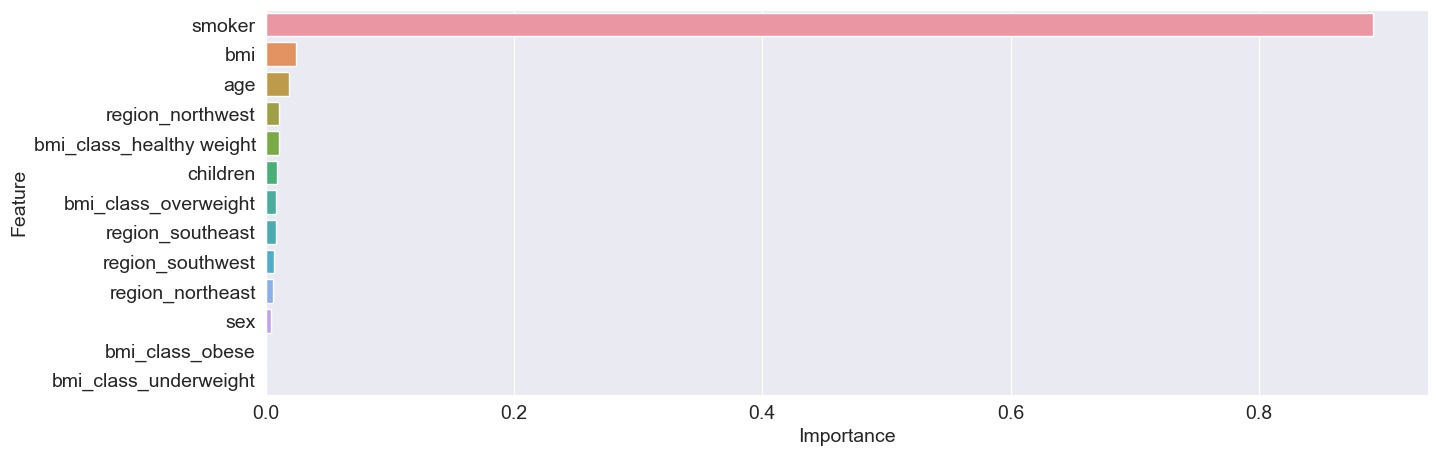

In [51]:
sns.barplot(data=feature_importance_df.sort_values('Importance', ascending=False), y='Feature', x='Importance');

In [ ]:
model.best_ntree_limit

In [52]:
from sklearn.metrics import r2_score

print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, model.predict(X_val))))

The R^2 Score for the Training Set is: 0.9263037122082278
The R^2 Score for the Validation Set is: 0.8935298560723908


In [53]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4423.181554135525
The NRMSE is: 0.07060308415924525


In [54]:
y_pred = model.predict(X_val)
y_pred[:10]

array([ 8259.336 ,  5895.2764, 12446.055 , 40056.832 ,  5124.14  ,
        9773.519 , 38074.395 ,  2030.7488,  8739.949 , 11488.333 ],
      dtype=float32)

In [55]:
y_val[:10]

900      8688.86
1064     5708.87
1256    11436.74
298     38746.36
237      4463.21
481      9304.70
240     38511.63
277      2150.47
415      7345.73
707     10264.44
Name: expenses, dtype: float64

In [ ]:
from sklearn.model_selection import cross_val_score

def optimal_max_depth_cv(number):
    max_depth_model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=number, random_state=42)
    rmse_scores = cross_val_score(max_depth_model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    avg_rmse = -rmse_scores.mean()
    return {'Max_Depth': number, 'Average_CV_Rmse': avg_rmse}

max_depth_cv_df = pd.DataFrame([optimal_max_depth_cv(number) for number in range(1, 10)]).sort_values('Average_CV_Rmse')
max_depth_cv_df.head()

In [ ]:
sns.lineplot(data=max_depth_cv_df, x='Max_Depth', y='Train_Rmse')
sns.lineplot(data=max_depth_cv_df, x='Max_Depth', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

In [56]:
def optimal_learning_rate_cv(number):
    model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=number, random_state=42)
    rmse_scores = cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
    avg_rmse = -rmse_scores.mean()
    return {'Learning_Rate': number, 'Average_CV_Rmse': avg_rmse}

In [ ]:
learning_rate_df = pd.DataFrame([optimal_learning_rate_cv(number) for number in np.arange(0.1,1,0.05)]).sort_values('Validation_Rmse')
learning_rate_df.head()

In [ ]:
sns.lineplot(data=learning_rate_df, x='Learning_Rate', y='Train_Rmse')
sns.lineplot(data=learning_rate_df, x='Learning_Rate', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

In [57]:
def optimal_child_weight(number):
    model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=0.35, min_child_weight=number ,random_state=42)
    model.fit(X_train, y_train)
    train_rmse = mean_squared_error(y_train, model.predict(X_train), squared=False)
    val_rmse = mean_squared_error(y_val, model.predict(X_val), squared=False)
    return {'Min_Child_Weight':number, 'Train_Rmse':train_rmse, 'Validation_Rmse':val_rmse}

child_weight_df = pd.DataFrame([optimal_child_weight(number) for number in range(0,10)]).sort_values('Validation_Rmse')
child_weight_df.head()

,Min_Child_Weight,Train_Rmse,Validation_Rmse
5,5,4242.209410,4210.108544
7,7,4249.829121,4215.394613
6,6,4248.718791,4216.192687
4,4,4239.135781,4216.702994
9,9,4251.297968,4216.824424


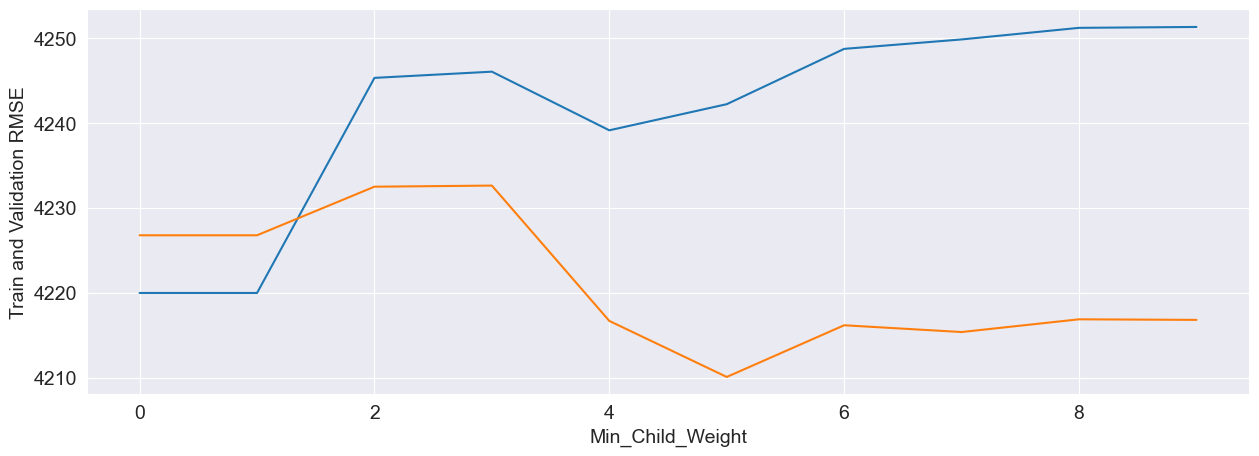

In [58]:
sns.lineplot(data=child_weight_df, x='Min_Child_Weight', y='Train_Rmse')
sns.lineplot(data=child_weight_df, x='Min_Child_Weight', y='Validation_Rmse')
plt.ylabel('Train and Validation RMSE');

In [59]:
final_model = XGBRegressor(n_jobs=-1, n_estimators=13, max_depth=3, learning_rate=0.35, min_child_weight=8, random_state=42)
final_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.35, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=8, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=13, n_jobs=-1,
             num_parallel_tree=None, random_state=42, ...)

In [60]:
print('The R^2 Score for the Training Set is: {}'.format(r2_score(y_train, final_model.predict(X_train))))
print('The R^2 Score for the Validation Set is: {}'.format(r2_score(y_val, final_model.predict(X_val))))

The R^2 Score for the Training Set is: 0.8680006678721011
The R^2 Score for the Validation Set is: 0.9032293821012666


In [61]:
rmse = mean_squared_error(y_val, final_model.predict(X_val), squared=False)

nrmse = rmse/(max(target_df)-min(target_df))

print('The RMSE is: {}'.format(rmse))
print('The NRMSE is: {}'.format(nrmse))

The RMSE is: 4216.893203705545
The NRMSE is: 0.06731029737484062


In [62]:
def make_new_predictions(single_input):
    single_input_df = pd.DataFrame([single_input])

    # Map categorical features
    single_input_df['bmi_class'] = single_input_df['bmi'].map(bmi_estimator)
    single_input_df['sex'] = single_input_df['sex'].map(sex_dict)
    single_input_df['smoker'] = single_input_df['smoker'].map(smoker_dict)

    # Encode categorical features
    single_input_df[encoded_cols] = encoder.transform(single_input_df[columns_to_encode]) 

    # Scale numerical features
    single_input_df[columns_to_scale] = scaler.transform(single_input_df[columns_to_scale])

    # Drop unnecessary columns
    single_input_df = single_input_df.drop(columns=['region', 'bmi_class'])

    # Make prediction
    pred = final_model.predict(single_input_df)[0]
    
    return 'The charge is: ${}'.format(pred)

In [63]:
new_input = {
    'age':23,
    'sex':'male',
    'bmi':28.1,
    'children':0,
    'smoker':'no',
    'region':'northwest'
}

In [64]:
make_new_predictions(new_input)

'The charge is: $4342.45458984375'

In [65]:
import tensorflow as tf
from tensorflow import keras

ann = keras.Sequential([
    keras.layers.Dense(10, input_shape=(13,), activation='relu'),
    keras.layers.Dense(3, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

ann.compile(
    optimizer='sgd',
    loss='mse',
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

ann.fit(X_train, y_train, epochs=100)




Epoch 1/100

34/34 [==============================] - 1s 4ms/step - loss: 225502593024.0000 - root_mean_squared_error: 474871.1250
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 819405440.0000 - root_mean_squared_error: 28625.2578
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 311250784.0000 - root_mean_squared_error: 17642.3008
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 181531264.0000 - root_mean_squared_error: 13473.3535
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 148422816.0000 - root_mean_squared_error: 12182.8906
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 139852016.0000 - root_mean_squared_error: 11825.9043
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 137801216.0000 - root_mean_squared_error: 11738.8760
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 137111248.0000 - root_mean_squared_er

34/34 [==============================] - 0s 8ms/step - loss: 136966512.0000 - root_mean_squared_error: 11703.2695
Epoch 60/100
34/34 [==============================] - 0s 7ms/step - loss: 137052832.0000 - root_mean_squared_error: 11706.9570
Epoch 61/100
34/34 [==============================] - 0s 6ms/step - loss: 136990128.0000 - root_mean_squared_error: 11704.2783
Epoch 62/100
34/34 [==============================] - 0s 6ms/step - loss: 136969328.0000 - root_mean_squared_error: 11703.3896
Epoch 63/100
34/34 [==============================] - 0s 6ms/step - loss: 137025120.0000 - root_mean_squared_error: 11705.7725
Epoch 64/100
34/34 [==============================] - 0s 7ms/step - loss: 136964976.0000 - root_mean_squared_error: 11703.2041
Epoch 65/100
34/34 [==============================] - 0s 7ms/step - loss: 136997776.0000 - root_mean_squared_error: 11704.6045
Epoch 66/100
34/34 [==============================] - 0s 5ms/step - loss: 136994928.0000 - root_mean_squared_error: 11704.48